In [10]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import xarray as xr

In [25]:
# load the map data

max_wind_nc = xr.open_dataset('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/pre_processing/maps/wind_maps/max_all_storms.nc')
max_wind_nc

<xarray.Dataset>
Dimensions:     (latitude: 153, longitude: 209)
Dimensions without coordinates: latitude, longitude
Data variables:
    wind        (latitude, longitude) float32 ...
    latitudes   (latitude) float32 ...
    longitudes  (longitude) float32 ...

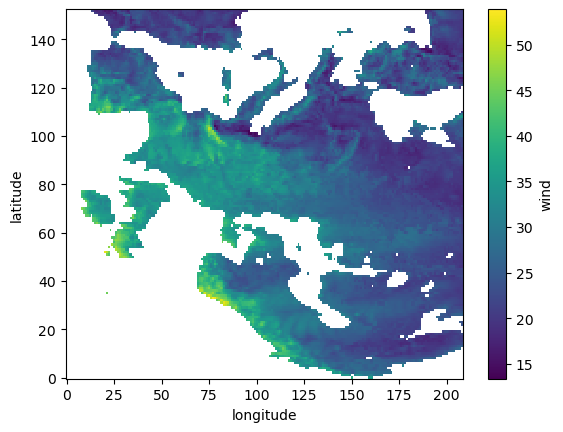

In [ ]:
max_wind_nc['wind'].plot()


In [121]:
from numpy import random
test_3D = random.randint(50, size=(100,3))

kmeans = KMeans(n_clusters=7, random_state=42).fit(test_3D)
kmeans.fit(test_3D)

kmeans.cluster_centers_
test_lebal = kmeans.labels_


/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [103]:
# create a 6 clusters model

dataset_reshape = max_wind_nc['wind'].values.reshape(-1,1)

# remove the -inf values
dataset_reshape = np.where(np.isfinite(dataset_reshape), dataset_reshape, 0)
dataset_reshape= dataset_reshape.reshape(-1, 1)

kmeans = KMeans(n_clusters=7, random_state=42).fit(dataset_reshape)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels: [1 1 1 ... 0 0 0]
Cluster Centers: [[2.0325027e+01]
 [8.5830688e-06]
 [3.5256195e+01]
 [2.3754213e+01]
 [4.1619774e+01]
 [2.7163395e+01]
 [3.1216839e+01]]


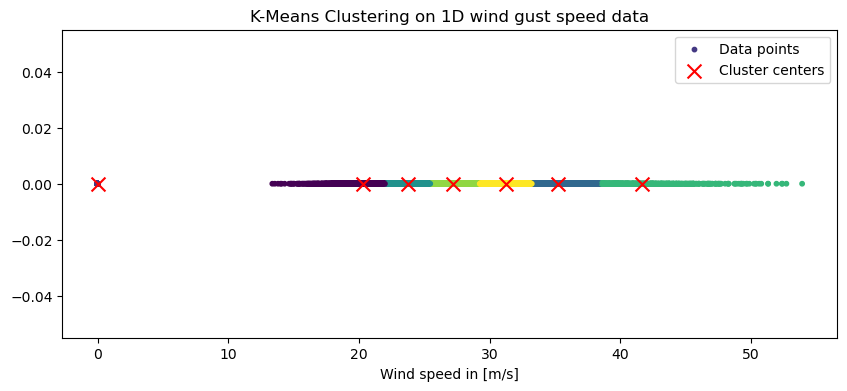

In [104]:
# Plotting
plt.figure(figsize=(10, 4))

# Scatter plot of data points with color-coded clusters
plt.scatter(dataset_reshape, np.zeros_like(dataset_reshape), c=labels, cmap="viridis", s=10, label="Data points")

# Plot the cluster centers on the same line (y=0) for simplicity
plt.scatter(centers, np.zeros_like(centers), c="red", s=100, marker="x", label="Cluster centers")

plt.xlabel("Wind speed in [m/s]")
plt.title("K-Means Clustering on 1D wind gust speed data")
plt.legend()
plt.show()

In [105]:
# extract the limit of each cluster group

# Get the minimum and maximum values of each cluster
cluster_limits = []
for i in range(7):
    cluster_data = dataset_reshape[labels == i]
    cluster_limits.append((cluster_data.min(), cluster_data.max()))

print("Cluster Limits:")
for i, (min_val, max_val) in enumerate(cluster_limits):
    print(f"Cluster {i}: [{min_val:.2f}, {max_val:.2f}]")

Cluster Limits:
Cluster 0: [13.37, 22.04]
Cluster 1: [0.00, 0.00]
Cluster 2: [33.24, 38.44]
Cluster 3: [22.04, 25.46]
Cluster 4: [38.45, 53.90]
Cluster 5: [25.46, 29.19]
Cluster 6: [29.19, 33.24]


In [107]:

labels_2d = labels.reshape(153,209)
centers_2D = kmeans.cluster_centers_

print("Cluster Labels:", labels_2D)
print("Cluster Centers:", centers_2D)

Cluster Labels: [4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6
 6 6 6 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4]
Cluster Centers: [[2.0325027e+01]
 [8.5830688e-06]
 [3.5256195e+01]
 [2.3754213e+01]
 [4.1619774e+01]
 [2.7163395e+01]
 [3.1216839e+01]]


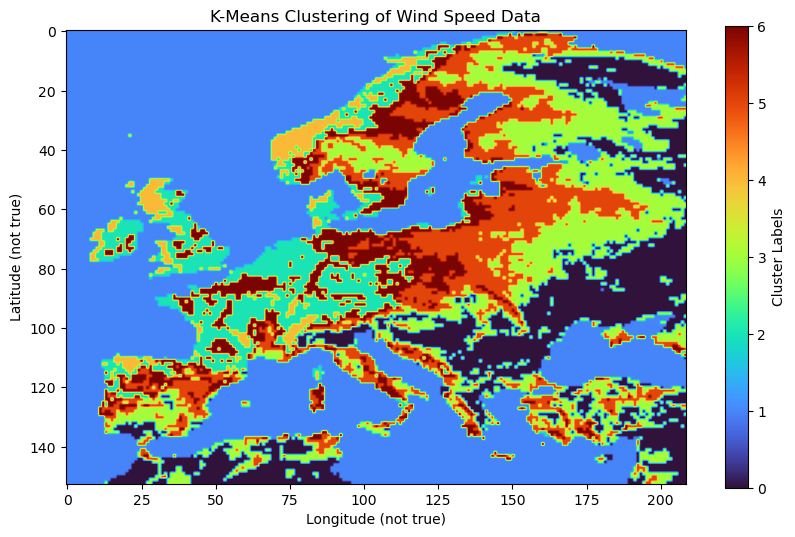

In [109]:
# Plotting
# Plotting the clusters on the 2D grid
plt.figure(figsize=(10, 6))
plt.imshow(labels_2d, cmap="turbo", origin="lower")
plt.colorbar(label="Cluster Labels")
plt.title("K-Means Clustering of Wind Speed Data")
plt.xlabel("Longitude (not true)")
plt.ylabel("Latitude (not true)")
plt.gca().invert_yaxis()
plt.show()

In [110]:
# extract the limit of each cluster group

# Get the minimum and maximum values of each cluster
cluster_limits = []
for i in range(7):
    cluster_data = wind_speed[labels == i]
    cluster_limits.append((cluster_data.min(), cluster_data.max()))

print("Cluster Limits:")
for i, (min_val, max_val) in enumerate(cluster_limits):
    print(f"Cluster {i}: [{min_val:.2f}, {max_val:.2f}]")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 153 but corresponding boolean dimension is 31977